

<img src="ALMAARC.png" width="250" height="240"  align="right"/> 



<hr style="border:2px solid darkblue"> </hr>

# NB2. Query a catalogue

<hr style="border:2px solid darkblue"> </hr>

In this notebook two functions are presented whi for a list of sources from a catalogue: 

* By name
* By coordinate

-------------

The relevant columns in the ALMA Archive datasets are 
* *s_ra*, *s_dec* (RAD and DEC in degress)
* *target_name* (source name)
 
--------- ----- -----





In [1]:
from astropy.table import Table
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import pyvo

service = pyvo.dal.TAPService("https://almascience.eso.org/tap")


<hr style="border:2px solid darkblue"> </hr>


## Query list of names
<hr style="border:2px solid darkblue"> </hr>



In [4]:

def query_coord_list(coord_list):#:fitscatalog, radius):

    query_strs=[]
    for i in range(len(coord_list)):
        if i==0:
            query = f"    SELECT  *  \
                          FROM  ivoa.obscore  \
                          WHERE  target_name = '{coord_list[i]}'\
                     " 
            query_strs.append(query)
        else:
            query = f"  target_name = '{coord_list[i]}'"
            
            query_strs.append(query)

    query_catalog= "OR".join(query_strs) 

    result = service.search(query_catalog)
    
    return result.to_table().to_pandas()

In [15]:

def query_coord_list(coord_list):#:fitscatalog, radius):
    
    print len(coord_list)
    query_strs=[]
    for i in range(len(coord_list)):
        if i==0:
            query = """
                 SELECT
                 *
                 FROM
                  ivoa.obscore
                 WHERE
                     target_name = {ALMA_matches_ids}
                     """ .format(**{
                    'ALMA_matches_ids':"'"+coord_list[i]+"'",
                    })
            query_strs.append(query)
        else:
            query = """
                     target_name = {ALMA_matches_ids}
                     """ .format(**{
                    'ALMA_matches_ids':"'"+coord_list[i]+"'",
                    })
            query_strs.append(query)

    query_catalog= "OR".join(query_strs) 
    result = service.search(query_catalog)
    
    return result.to_table().to_pandas()

<hr style="border:2px solid darkblue"> </hr>

## Query list of coordinates

<hr style="border:2px solid darkblue"> </hr>



In [5]:

def query_coord_list(RASs, DECs, radius):#:fitscatalog, radius):

    query_strs=[]
    for i in range(len(RASs)):
        if i==0:
            query = """
                 SELECT
                    DISTANCE(
                      POINT('ICRS', s_ra, s_dec),
                      POINT('ICRS',{ra},{dec})
                      )
                     AS dist, *
                 FROM
                      ivoa.obscore
                 WHERE
                     CONTAINS(
                     POINT('ICRS', s_ra, s_dec),
                     CIRCLE('ICRS',{ra},{dec} ,{radius}))=1
                     """ .format(**{
                    'ra': RAs[i], 'dec': DECs[i], 
                    'radius': radius,
                    })
            query_strs.append(query)
        else:
            query = """
                     CONTAINS(
                     POINT('ICRS', s_ra, s_dec),
                     CIRCLE('ICRS',{ra},{dec} ,{radius}))=1
                     """ .format(**{
                    'ra': RAs[i], 'dec': DECs[i], 
                    'radius': radius,
                    })
            query_strs.append(query)

    query_catalog= "OR".join(query_strs) 
    result = service.search(query_catalog)
    
    return result.to_table().to_pandas()

## Example 2a: Query a catalogue of high-z quasars

First we import a catalogue of high redshift quasars from Vizier, using astroquery:

In [6]:
from astroquery.vizier import Vizier
catalog_list = Vizier.get_catalogs('J/ApJS/227/11')
highzqso_catalog = catalog_list['J/ApJS/227/11/highzqso']


We will now use the RA and DEC coordinates in the catalogue to do the search in the ALMA archive. To start with a shorter search we will only search for the first 10 sources.

In [16]:
RAs=highzqso_catalog['RAJ2000'][0:50]
DECs=highzqso_catalog['DEJ2000'][0:50]

We now query the ALMA archive:


In [17]:
results = query_coord_list(RAs, DECs, 0.006)


In [18]:
results.head(5) ### show only5, for visualization purposes

,dist,access_url,access_format,proposal_id,data_rights,gal_longitude,gal_latitude,obs_publisher_did,obs_collection,facility_name,instrument_name,obs_id,dataproduct_type,calib_level,target_name,s_ra,s_dec,s_fov,s_region,s_resolution,t_min,t_max,t_exptime,t_resolution,em_min,em_max,em_res_power,pol_states,o_ucd,band_list,em_resolution,authors,pub_abstract,publication_year,proposal_abstract,schedblock_name,proposal_authors,sensitivity_10kms,cont_sensitivity_bandwidth,pwv,group_ous_uid,member_ous_uid,asdm_uid,obs_title,type,scan_intent,science_observation,spatial_scale_max,bandwidth,antenna_arrays,is_mosaic,obs_release_date,spatial_resolution,frequency_support,frequency,velocity_resolution,obs_creator_name,pub_title,first_author,qa2_passed,bib_reference,science_keyword,scientific_category,lastModified
0,35.259093,http://almascience.org/aq?member_ous_id=uid://...,text/html,2011.0.00206.S,Public,143.742975,-61.898944,ADS/JAO.ALMA#2011.0.00206.S,ALMA,JAO,ALMA,uid://A002/X391d0b/X22,image,2,J0129-0035,22.493792,-0.594361,0.005630,Circle ICRS 22.493792 -0.594361 0.002815,0.473461,56069.496754,56069.574857,2661.12,2661.12,0.001022,0.001029,9386.45608,/XX/YY/,phot.flux.density;phys.polarization,7,9.368122e+15,"Champagne, Jaclyn B.; Decarli, Roberto; Casey,...",Bright high-redshift quasars (z &gt; 6) hostin...,2017,Huge amounts of far-infrared (FIR)-emitting wa...,J0129-0035,"Narayanan, Desika; Riechers, Dominik; Fan, Xia...",1.152586,0.037899,0.90717,,uid://A002/X391d0b/X22,uid://A002/X411025/X6d7,Dust continum and [C II] line emission from qu...,S,TARGET,T,4.264570,2.000000e+09,A003:DA41 A004:DV04 A011:DV12 A021:DV08 A025:D...,F,2013-06-25T16:06:00.000,0.473461,"[279.33..281.31GHz,31250.00kHz,1mJy/beam@10km/...",287.322530,31722.538623,"Wang, Ran",Dynamical Characterization of Galaxies at z ∼ ...,"Champagne, Jaclyn B. Jones, G. C. Miller, Tim ...",T,2013ApJ...773...44W 2014ApJ...795....5O 2017Ap...,"High-z Active Galactic Nuclei (AGN), Active Ga...",Active galaxies,2021-06-16T16:46:50.431
1,45.248738,http://almascience.org/aq?member_ous_id=uid://...,text/html,2011.0.00243.S,Public,166.654305,-60.934934,ADS/JAO.ALMA#2011.0.00243.S,ALMA,JAO,ALMA,uid://A002/X3ff4ae/X36,image,2,CFHQSJ0210-0456,32.554958,-4.939142,0.006483,Circle ICRS 32.554958 -4.939142 0.003242,0.542146,56112.416643,56149.305258,6168.96,6168.96,0.001158,0.001167,8284.55000,/XX/YY/,phot.flux.density;phys.polarization,6,9.367944e+15,"Ando, Ryo; Kohno, Kotaro; Tamura, Yoichi; Izum...",Bright high-redshift quasars (z &gt; 6) hostin...,2013,We propose to observe two z=6.4 quasars to det...,CFHQSJ0210-0456 Band 6,"Omont, Alain; Bergeron, Jacqueline;",1.378055,0.041881,1.61117,,uid://A002/X3ff4ae/X36,uid://A002/X44f2b6/X201,The black hole - galaxy mass relationship at r...,S,TARGET,T,5.137521,2.000000e+09,A003:DA41 A004:DV04 A008:DV19 A011:DV12 A015:D...,F,2013-09-13T20:05:00.000,0.542146,"[240.09..242.08GHz,31250.00kHz,1.2mJy/beam@10k...",249.485053,36186.933267,"Willott, Chris",ALMA Census of Faint 1.2 mm Sources Down to ~ ...,"Ando, Ryo Bischetti, M. Carniani, S. Champagne...",T,2013ApJ...770...13W 2014ApJ...795....5O 2015A&...,"High-z Active Galactic Nuclei (AGN), Active Ga...",Active galaxies,2021-06-16T16:46:50.431
2,35.259093,http://almascience.org/aq?member_ous_id=uid://...,text/html,2011.0.00206.S,Public,143.742975,-61.898944,ADS/JAO.ALMA#2011.0.00206.S,ALMA,JAO,ALMA,uid://A002/X391d0b/X22,image,2,J0129-0035,22.493792,-0.594361,0.005630,Circle ICRS 22.493792 -0.594361 0.002815,0.473461,56069.496754,56069.574857,2661.12,2661.12,0.001058,0.001066,9064.45608,/XX/YY/,phot.flux.density;phys.polarization,7,9.368122e+15,"Champagne, Jaclyn B.; Decarli, Roberto; Casey,...",Bright high-redshift quasars (z &gt; 6) hostin...,2017,Huge amounts of far-infrared (FIR)-emitting wa...,J0129-0035,"Narayanan, Desika; Riechers, Dominik; Fan, Xia...",1.049808,0.037899,0.90717,,uid://A002/X391d0b/X22,uid://A002/X411025/X6d7,Dust continum and [C II] line emission from qu...,S,TARGET,T,4.264570,

We can now plot the distribution of ALMA observed quasars from the chosen catalogue.

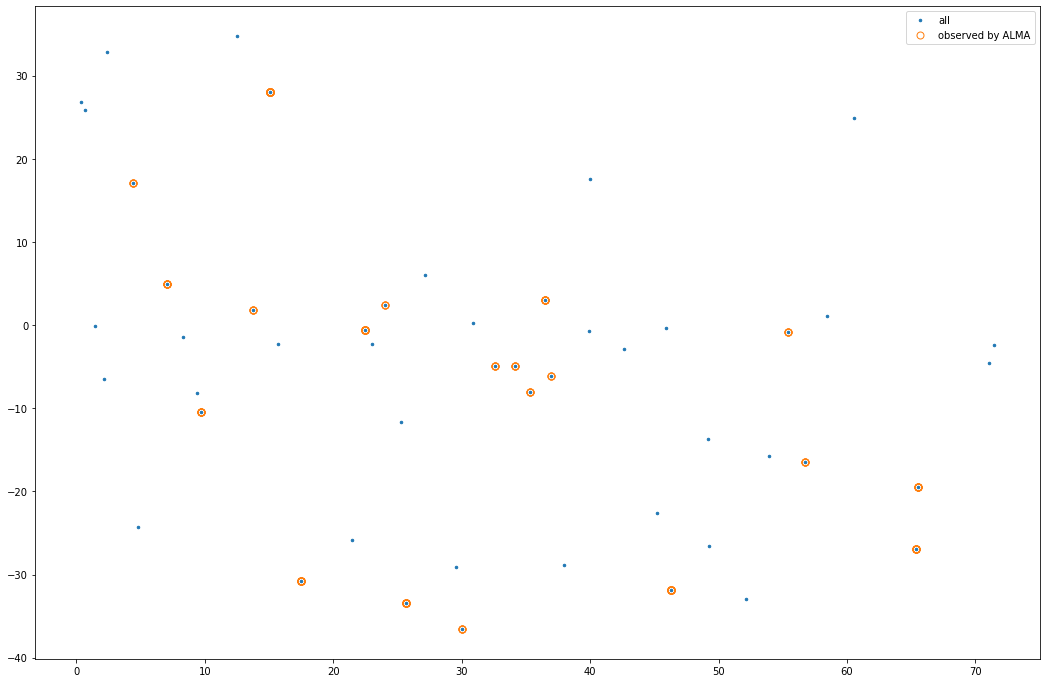

In [19]:
import matplotlib.pyplot as plt 

plt.rcParams["figure.figsize"] = (15,10)

plt.plot(RAs,DECs, ls='', marker='.', ms=5, label='all')
plt.plot(results['s_ra'],results['s_dec'], ls='', marker='o',ms=7, fillstyle='none', label='observed by ALMA')
plt.legend()